In [1]:
# %pip install matplotlib seaborn scipy matplotlib

### **Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

### **Estatística e Machine Learning - QUESTÃO 1**

**Dado um dataset das estaturas (em centímetros) de 13 indivíduos:**

``dataset = [175, 166, 183, 193, 155, 177, 173, 171, 162, 185, 176, 161, 188, 215, 230]``

**Calcular:**
- ``Média``

- ``Mediana``

- ``20 Percentil``

- ``80 Percentil``

- ``Desvio padrão``
<br></br>

**Além disso, determinar qual distribuição os dados mais se aproximam e como os outliers a afetam.**

In [3]:
dataset = [175, 166, 183, 193, 155, 177, 173, 171, 162, 185, 176, 161, 188, 215, 230]
dataset_df = pd.DataFrame(dataset, columns=['estatura'])
dataset_df.sort_values(by=['estatura'], inplace=True)

print(f'Média: {dataset_df['estatura'].mean():.2f}')
print(f'Mediana: {dataset_df['estatura'].median():.2f}')

moda = dataset_df['estatura'].mode()
if len(moda) == len(dataset_df):
    print(f'Moda: -')
else:
    print(f'Moda: {", ".join(map(str, moda))}')

print(f'\nVariância: {dataset_df['estatura'].var(ddof=1):.2f}')
print(f'Desvio padrão: {dataset_df['estatura'].std(ddof=1):.2f}\n')

# No cálculo dos percentis utilizei dois métodos:
#   1. Metodo manual sem utilizar a função dataset_df['estatura'].quantile() 
#   2. Utilizando dataset_df['estatura'].quantile() -
#      Esta utiliza interpolação linear, mais precisa para amostras maiores
#
# Metodo simples sem interpolação:
print(f'20 Percentil (pandas): {dataset_df['estatura'].quantile(q=0.2):.2f}')
print(f'80 Percentil (pandas): {dataset_df['estatura'].quantile(q=0.8):.2f}\n')

percentis = [20, 80]

for P in percentis:
    percentil = P / 100 * len(dataset_df)

    if percentil % 1 > 0:
        percentil = np.mean(
            [
            dataset_df.iloc[int(np.floor(percentil)) - 1, 0],
            dataset_df.iloc[int(np.ceil(percentil)) - 1, 0]
            ]
        )
    else:
        percentil = dataset_df.iloc[int(percentil) - 1, 0]
    print(f'{P} Percentil (manual): \t{percentil:.2f}')





Média: 180.67
Mediana: 176.00
Moda: -

Variância: 405.10
Desvio padrão: 20.13

20 Percentil (pandas): 165.20
80 Percentil (pandas): 189.00

20 Percentil (manual): 	162.00
80 Percentil (manual): 	188.00


### **Plotando o histograma**

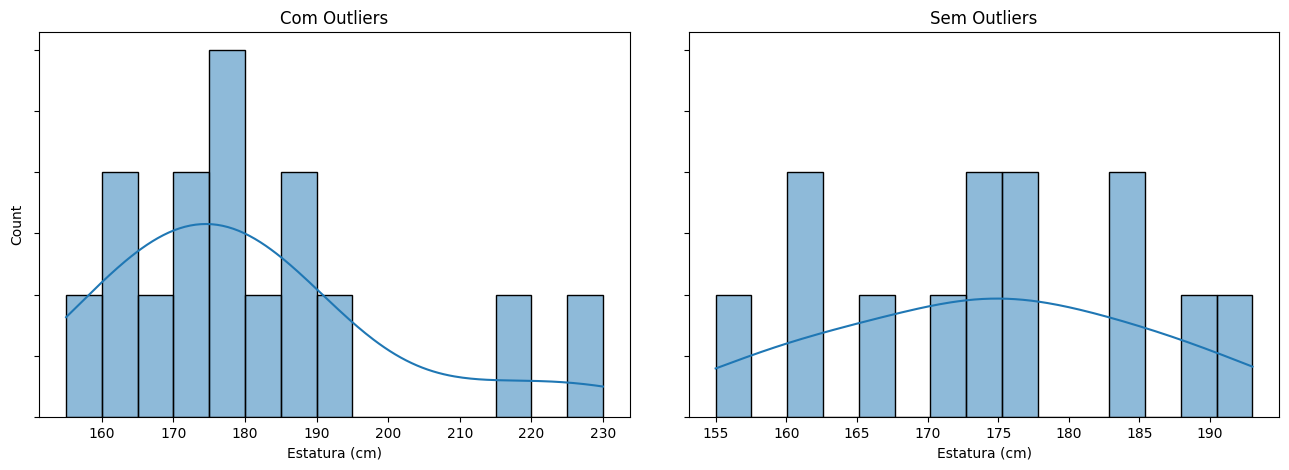

COM OUTLIERS			SEM OUTLIERS
-------------------------	-------------------------
Média: 180.67			Média: 174.23
Mediana: 176.00			Mediana: 175.00
Desvio padrão: 20.13		Desvio padrão: 11.26

Assimetria: 1.28		Assimetria: -0.05
Curtose: 1.66			Curtose: -0.71

Estatística (W1): 0.8941	Estatística (W2): 0.9805
p-valor: 0.0774			p-valor: 0.9820


In [4]:
df_sem_outlier = dataset_df.iloc[:-2]

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)  
axes[0].set_xlabel('Estatura (cm)')
axes[0].set_title('Com Outliers')
axes[0].set_yticklabels([])
axes[1].set_xlabel('Estatura (cm)')
axes[1].set_title('Sem Outliers')
axes[1].set_yticklabels([])

sns.histplot(dataset_df['estatura'], bins=15, kde=True, discrete=False, ax=axes[0])
sns.histplot(df_sem_outlier['estatura'], bins=15, kde=True, discrete=False, ax=axes[1])

plt.subplots_adjust(wspace=0.1)
plt.show()

# Print statistics using Pandas
print('COM OUTLIERS\t\t\tSEM OUTLIERS')
print('-------------------------\t-------------------------')
print(f'Média: {dataset_df["estatura"].mean():.2f}\t\t\tMédia: {df_sem_outlier["estatura"].mean():.2f}')
print(f'Mediana: {dataset_df["estatura"].median():.2f}\t\t\tMediana: {df_sem_outlier["estatura"].median():.2f}')
print(f'Desvio padrão: {dataset_df["estatura"].std():.2f}\t\tDesvio padrão: {df_sem_outlier["estatura"].std():.2f}')
print(f'\nAssimetria: {dataset_df["estatura"].skew():.2f}\t\tAssimetria: {df_sem_outlier["estatura"].skew():.2f}')
print(f'Curtose: {dataset_df["estatura"].kurt():.2f}\t\t\tCurtose: {df_sem_outlier["estatura"].kurt():.2f}')

# Shapiro-Wilk normality test
estatisticaW, p_valor = shapiro(dataset_df['estatura'])
estatisticaW2, p_valor2 = shapiro(df_sem_outlier['estatura'])
print(f"\nEstatística (W1): {estatisticaW:.4f}\tEstatística (W2): {estatisticaW2:.4f}")
print(f"p-valor: {p_valor:.4f}\t\t\tp-valor: {p_valor2:.4f}")


Observando o histograma **com outliers** nota-se que a distribuição se aproxima de uma **distribuição normal.**

 - O valor da **assimetria (1.15)** indica uma assimetria positiva (cauda longa à direita) causada pelos dois outliers **(215cm e 230cm)**

   - A presença destes outliers ``aumentou`` a **média (180.67cm)** em relação a **mediana (176.00cm)**

   - E também ``inflam`` o valor do desvio padrão (19.44)
<br></br>

Ao observar o histograma **sem outliers**, podemos perceber que a **média (174.23)** e a **mediana (175.00)** estão muito mais próximas
<br></br>

### **Teste de Shapiro-Wilk**

O teste verifica se os datasets **com e sem outliers** possuem distribuição normal.

**Hipotese nula $H_0:$ Os dados seguem distribuição normal.**

- Se $p \geq 0.05:$ aceita-se $H_0$

- Se $p < 0.05:$ rejeita-se $H_0$
<br></br>

Analisando os valores dos testes temos que:
- **COM OUTLIERS:**
    
    - O **p-value** é um pouco maior que **0.05**, então não rejeitamos a hipótese $H_0$ mas também não garante que a distribuição seja normal

    - Porém o fato de que **W1 < W2** indica que ``a presença dos outliers tornam a distribuição menos normal``
<br></br>

- **SEM OUTLIERS:**
    
    - O **p-value** está próximo de 1, sugerindo que os dados estão muito próximos de uma distribuição normal.
    
    - Um **W** mais alto sugere que ``a distribuição se aproxima mais da normalidade`` após a remoção dos outliers.